# CA1 MNist CNN Assignment
# done by ng ao yang p1935602 dit/ft/2b/11

#Prediction task
-defined by 
- training the deep learning model to recognized digits (0 to 9 ) through data(input) and tuning it to make it more accurate.
- output variable will be the digits recognized by the algorithm

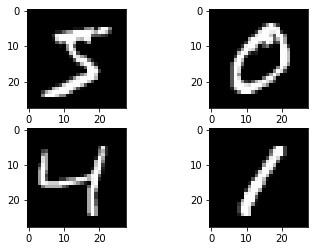

In [ ]:
# Plot mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


plotting digits using dataset provided

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Older Keras 1.X API, for 2D (image) set_image_dim_ordering('th') 
# assumes (depth,rows,cols), 'tf' assumes (rows,cols,depth). 
# K.set_image_dim_ordering('th')
# Keras 2.X API, for 2D (image) set_image_data_format('channels_first') 
# assumes (depth,rows,cols), 'channels_last' assumes (rows,cols,depth). 
K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 - 1s - loss: 0.2460 - accuracy: 0.9290 - val_loss: 0.0741 - val_accuracy: 0.9768
Epoch 2/10
300/300 - 1s - loss: 0.0748 - accuracy: 0.9783 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 3/10
300/300 - 1s - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0405 - val_accuracy: 0.9868
Epoch 4/10
300/300 - 1s - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0372 - val_accuracy: 0.9878
Epoch 5/10
300/300 - 1s - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 6/10
300/300 - 1s - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0398 - val_accuracy: 0.9872
Epoch 7/10
300/300 - 1s - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0355 - val_accuracy: 0.9873
Epoch 8/10
300/300 - 1s - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0295 - val_accuracy: 0.9895
Epoch 9/10
300/300 - 1s - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 10/10
300/300 - 1s - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0346 - val_accuracy: 0.9889

pretty high acccuracy, feels overfit to me, especially it is trained on 10 epochs, and only exposed to a certain dataset.

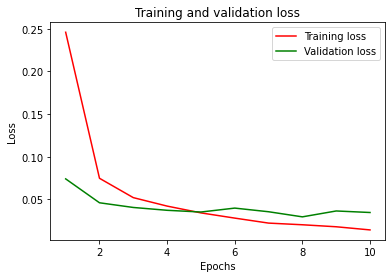

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

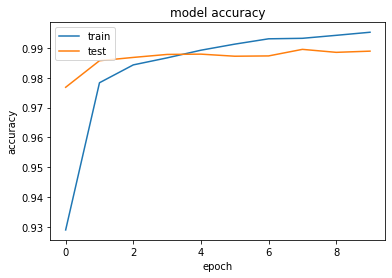

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# How is the data represented as features?
- The first column is the digit which was drawn by user, the rest of the columns contain the pixel values for the respective image. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.


In [ ]:
# Larger CNN Model
import numpy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler

# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],1,28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1,28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])



# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=100, batch_size=2100000, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))





Epoch 1/100
1/1 - 0s - loss: 2.3099 - accuracy: 0.1115 - val_loss: 2.2771 - val_accuracy: 0.1361
Epoch 2/100
1/1 - 0s - loss: 2.2823 - accuracy: 0.1460 - val_loss: 2.2517 - val_accuracy: 0.2187
Epoch 3/100
1/1 - 0s - loss: 2.2588 - accuracy: 0.2004 - val_loss: 2.2264 - val_accuracy: 0.3197
Epoch 4/100
1/1 - 0s - loss: 2.2350 - accuracy: 0.2665 - val_loss: 2.1966 - val_accuracy: 0.4024
Epoch 5/100
1/1 - 0s - loss: 2.2072 - accuracy: 0.3254 - val_loss: 2.1594 - val_accuracy: 0.4611
Epoch 6/100
1/1 - 0s - loss: 2.1737 - accuracy: 0.3706 - val_loss: 2.1141 - val_accuracy: 0.5065
Epoch 7/100
1/1 - 0s - loss: 2.1329 - accuracy: 0.4023 - val_loss: 2.0603 - val_accuracy: 0.5365
Epoch 8/100
1/1 - 0s - loss: 2.0840 - accuracy: 0.4245 - val_loss: 1.9974 - val_accuracy: 0.5511
Epoch 9/100
1/1 - 0s - loss: 2.0269 - accuracy: 0.4464 - val_loss: 1.9247 - val_accuracy: 0.5678
Epoch 10/100
1/1 - 0s - loss: 1.9611 - accuracy: 0.4707 - val_loss: 1.8415 - val_accuracy: 0.5995
Epoch 11/100
1/1 - 0s - loss:

Complex nn, feels more fitting to me with lower loss but lower accuracy too.

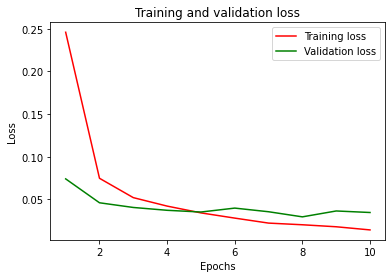

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

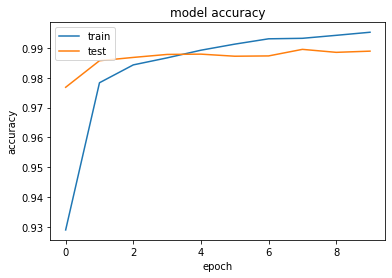

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
dataGen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.15,zoom_range=[0.5,2],validation_split=0.2)
dataGen.fit(X_train)


generating rotated digits for my model to train on

In [ ]:
train_generator = dataGen.flow(X_train, y_train, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='training')

validation_generator = dataGen.flow(X_train, y_train, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='validation')

basically something like the X_train ,y_Train and validation ( X_test,Y_test)

In [ ]:
filepath_val_acc="model_gen_cnn_acc.best.hdf5"
checkpoint_val_acc = ModelCheckpoint(filepath_val_acc, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_val_acc]


saving best model only

In [ ]:
history = model.fit_generator(train_generator,
                                                steps_per_epoch = 600,
                                                epochs=100,
                                                validation_data = validation_generator,
                                                validation_steps = 150,
                                                callbacks = callbacks_list)
# history = model.fit_generator(X_train, y_train, validation_data=(X_test, y_test), 
#           epochs=100, batch_size=2100000, verbose=2)

Epoch 1/100
600/600 [==============================] - 13s 21ms/step - loss: 1.0337 - accuracy: 0.6743 - val_loss: 0.6077 - val_accuracy: 0.8161
Epoch 2/100
600/600 [==============================] - 13s 21ms/step - loss: 0.5924 - accuracy: 0.8154 - val_loss: 0.4496 - val_accuracy: 0.8627
Epoch 3/100
600/600 [==============================] - 13s 22ms/step - loss: 0.4779 - accuracy: 0.8477 - val_loss: 0.3542 - val_accuracy: 0.8919
Epoch 4/100
600/600 [==============================] - 13s 21ms/step - loss: 0.4220 - accuracy: 0.8673 - val_loss: 0.3263 - val_accuracy: 0.9024
Epoch 5/100
600/600 [==============================] - 13s 21ms/step - loss: 0.3731 - accuracy: 0.8814 - val_loss: 0.3040 - val_accuracy: 0.9053
Epoch 6/100
600/600 [==============================] - 13s 22ms/step - loss: 0.3452 - accuracy: 0.8923 - val_loss: 0.2668 - val_accuracy: 0.9156
Epoch 7/100
600/600 [==============================] - 13s 22ms/step - loss: 0.3252 - accuracy: 0.8976 - val_loss: 0.2733 - val_ac

model trained on augmented data, with saving best model. Feels like this model is more exposed to more unique data as such is more fitting.

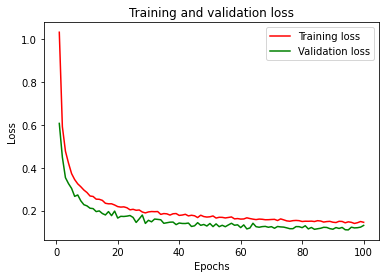

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

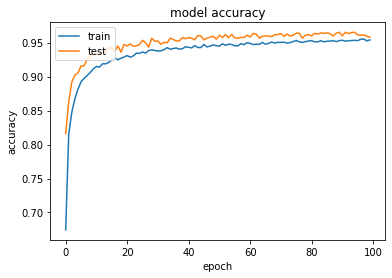

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
Y_prediction = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

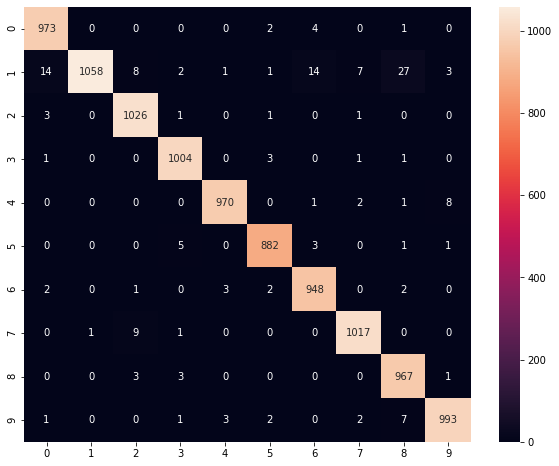

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

confusion matrix on the model trained on augmented data. Very interesting to see 1 recognised as 8 vice versa. 

#  Did you process the features in any way (e.g. normalization)?
- Yes, i normalized the features as each pixel values has a range of 0 to 255, i normalized it such that the pixel values only ranges from 0 to 1, so that the values wouldnt not be so skewed.

# How did you select which CNN architecture to use?
The cnn architecure is made up of a convolutional layer with 30 feature maps of size 5×5, ooling layer taking the max over 2*2 patches, to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the networkconvolutional layer with 15 feature maps of size 3×3,Pooling layer taking the max over 2*2 patches,dropout layer with a probability of 20% to randomly exclude 20% of neurons in the layer in order to reduce overfitting flatten layer to convert the data into a 1-dimensional array for inputting it to the next layerfully connected layer with 128 neurons and rectifier activation, and a output layer to output the image.


#  How do you evaluate the quality of your system?
- After training the model, there will be a 'value accuracy' for each epoch and that will give me an indication how well the model recognize the digits.There will also be a loss function to see how far the values ranges from the original value. I plot the loss and value accuracy graph against epochs afterwards to have a rough idea how good my model is performing till certain epochs.



# • Can you say anything about the errors that the system makes?
- Using confusion matrix, i can detect what i call a 'false positive' in the model, whereby the model mistakenly recognize a certain digit from another that has a slight resemblance to each other. 


#Please show how you have improved the model from the initial

- i started from a simple nn model from the practical, having 6 layers, a hidden layer consisting of 32 feature maps, a pooling layer with a pool size 2x2,a regularization layer using dropout to randomly exlcude 20% neurons in layer to reduce overfit.Next is a layer that converts 2D matrix data  to a vector called flatten to allow output to be processed by fully connected layers.
Next is a fully connected layer with 128 neurons and rectifier activation function. Lastly the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability like predictions for each class. obtaining a val accuracy of 99% and a 0.3 % loss.

The one i used to work on is the complex nn model
•	Convolutional layer with 30 feature maps of size 5×5.
•	Pooling layer taking the max over 2*2 patches.
•	Convolutional layer with 15 feature maps of size 3×3.
•	Pooling layer taking the max over 2*2 patches.
•	Dropout layer with a probability of 20%.
•	Flatten layer.
•	Fully connected layer with 128 neurons and rectifier activation.
•	Fully connected layer with 50 neurons and rectifier activation.
•	Output layer.

Then i further tuned the model by augmenting the data(rotation) and only saving the best performing model in terms of accruacy afterwards.